# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [15]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
# Import API key
from api_keys import geoapify_key

In [16]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

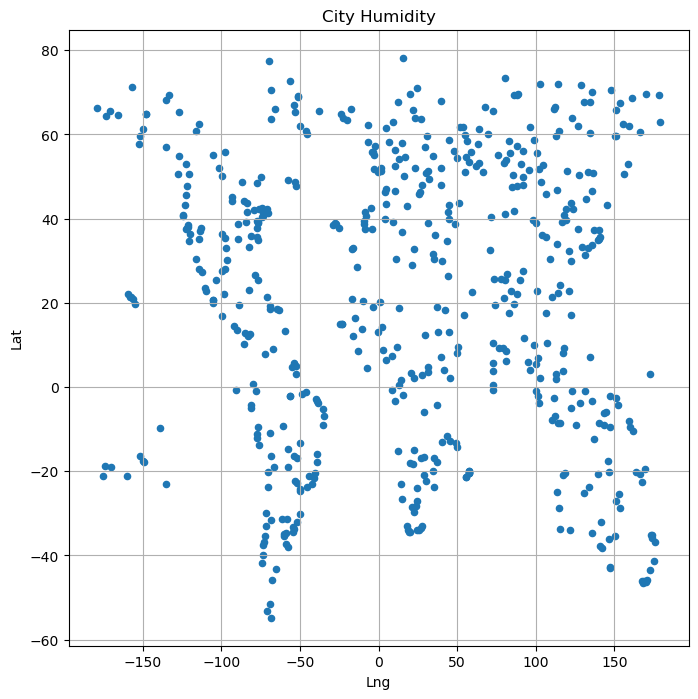

In [17]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lng", y="Lat", grid=True, figsize=(8,8),
              title="City Humidity")
# Display the map
# YOUR CODE HERE
city_data_df.plot

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [18]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE
select_cities = city_data_df[(city_data_df["Cloudiness"]<35) & (city_data_df["Humidity"]<60) &
                                (city_data_df["Country"]=="US") & (city_data_df["Max Temp"]<35)& (city_data_df["Wind Speed"]<3)]

# Drop any rows with null values
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE
select_cities

,City_ID,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
90,90,90,90,saint george,37.1041,-113.5841,13.33,44,0,1.54,US,1666108286
115,115,115,115,cedar city,37.6775,-113.0619,14.11,49,0,0.00,US,1666108304
565,565,565,565,wyndham,37.6985,-77.6125,12.81,52,3,1.79,US,1666108480


### Step 3: Create a new DataFrame called `hotel_df`.

In [19]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE
hotel_df = pd.DataFrame(select_cities).copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE
hotel_df['Hotel Name'] = ''

# Display sample data
# YOUR CODE HERE
hotel_df

,City_ID,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
90,90,90,90,saint george,37.1041,-113.5841,13.33,44,0,1.54,US,1666108286,
115,115,115,115,cedar city,37.6775,-113.0619,14.11,49,0,0.00,US,1666108304,
565,565,565,565,wyndham,37.6985,-77.6125,12.81,52,3,1.79,US,1666108480,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [20]:
# Set parameters to search for a hotel
radius = 10000
params = {
    "categories" : "accommodation.hotel", "apiKey" : geoapify_key, "limit":10}


# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row["Lat"]
    lon = row["Lng"]    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{lat},{lon},{radius}"
    params["bias"] = f"proximity:{lat},{lon}"

    
    # Set base URL
    base_url = "https://api.openweathermap.org/data/3.0/weather"


    # Make and API request using the params dictionaty
    name_address = requests.get(base_url, params=params)
    
    
    # Convert the API response to JSON format
    name_address = name_address.json()

    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
saint george - nearest hotel: No hotel found
cedar city - nearest hotel: No hotel found
wyndham - nearest hotel: No hotel found


,City_ID,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
90,90,90,90,saint george,37.1041,-113.5841,13.33,44,0,1.54,US,1666108286,No hotel found
115,115,115,115,cedar city,37.6775,-113.0619,14.11,49,0,0.00,US,1666108304,No hotel found
565,565,565,565,wyndham,37.6985,-77.6125,12.81,52,3,1.79,US,1666108480,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [26]:
pip install cartopy


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install geoviews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.8/509.8 kB 4.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 13.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.6 MB/s eta 0:00:0000:0100:01
  Using cached xyzservices-2023.7.0-py3-none-any.whl (56 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdit_py_plugins-0.4.0-py3-none-any.whl (54 kB)
  Using cached linkify_it_py-2.0.2-py3-none-any.whl (19 kB)
  Using cached uc_micro_py-1.0.2-py3-none-any.whl (6.2 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
  Attempting uninstall: panel
    Found existing installation: panel 0.14.3
    Uninstalling panel-0.14.3:
      Successfully uninstalle

In [31]:
import cartopy.crs as ccrs

In [37]:
pip install gmaps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076091 sha256=8341428096f1ff4d6b438f15286637364e86363c7bdfbd01c5e3798c673d5105
  Stored in directory: /Users/t/Library/Caches/pip/wheels/b6/ac/b0/f2cc081243b337b832a27835d3d80ad0c38c1d2bd5223f0f84
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.


In [36]:
import requests
import gmaps
import os
import pyproj

ModuleNotFoundError: No module named 'gmaps'

In [ ]:
%%capture --no-display

# Configure the map plot
hotel_plot = hotel_df.hvplot.points(
    "Lng", 
    "Lat", 
    geo = True,
    tiles = "OSM",
    size = "Humidity",
    color = "Humidity",
    xlabel = "Longitude",
    ylabel = "Latitude",
    hover_cols = ["Hotel Name", "Country"])

# Display the map
hotel_plot

ImportError: Geographic projection support requires GeoViews, pyproj and cartopy.